In [122]:
import pandas as pd
import pylab as plt
import seaborn as sns

df = pd.read_csv("./data/train.csv")

# Overview and Cleaning

In [123]:
print(df.head())

              datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1  


In [124]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB
None


In [125]:
print(df.describe())

             season       holiday    workingday       weather         temp  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.00000   
mean       2.506614      0.028569      0.680875      1.418427     20.23086   
std        1.116174      0.166599      0.466159      0.633839      7.79159   
min        1.000000      0.000000      0.000000      1.000000      0.82000   
25%        2.000000      0.000000      0.000000      1.000000     13.94000   
50%        3.000000      0.000000      1.000000      1.000000     20.50000   
75%        4.000000      0.000000      1.000000      2.000000     26.24000   
max        4.000000      1.000000      1.000000      4.000000     41.00000   

              atemp      humidity     windspeed        casual    registered  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.000000   
mean      23.655084     61.886460     12.799395     36.021955    155.552177   
std        8.474601     19.245033      8.164537     49.96047

In [126]:
print(df["count"].sum())
print(df.isna().sum())

2085476
datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64


In [127]:
df["datetime"] = pd.to_datetime(df["datetime"])
df.index = df["datetime"]

In [128]:
# Making a tidy dataset

df["year"] = df["datetime"].dt.year
df["month"] = df["datetime"].dt.month
df["day"] = df["datetime"].dt.day
df["dayofweek"] = df["datetime"].dt.dayofweek # Monday = 0
df["hour"] = df["datetime"].dt.hour

In [129]:
# The original "season" column actually refers to calendar quarters. As Washington, D.C., has a great deal of university students, families, and legislators who behave differently whether classes or Congress are in session, as well as tourists, I wanted to also look at climatic seasons: winter (December-February), spring (March-May), summer (June-August: no classes), and fall (September-November)

df = df.rename(columns = {"season": "quarter"})
df["season"] = ""

df.loc[df.month == 12, "season"] = "1"
df.loc[df.month == 1, "season"] = "1"
df.loc[df.month == 2, "season"] = "1"
df.loc[df.month == 3, "season"] = "2"
df.loc[df.month == 4, "season"] = "2"
df.loc[df.month == 5, "season"] = "2"
df.loc[df.month == 6, "season"] = "3"
df.loc[df.month == 7, "season"] = "3"
df.loc[df.month == 8, "season"] = "3"
df.loc[df.month == 9, "season"] = "4"
df.loc[df.month == 10, "season"] = "4"
df.loc[df.month == 11, "season"] = "4"

df["season"] = df["season"].astype(int)

# Assessing Temporal Patterns

<Axes: xlabel='datetime'>

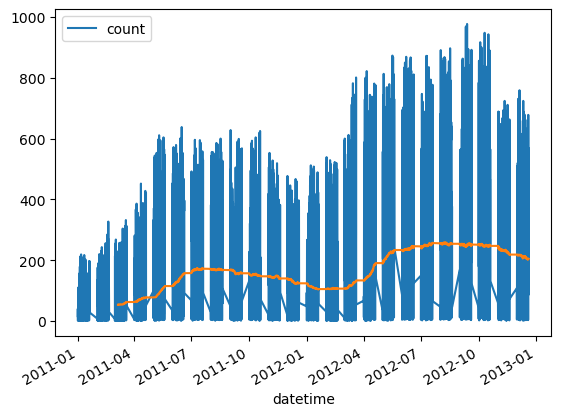

In [130]:
df.plot(y="count")

df.rolling(1000)['count'].median().plot(y='count') # rolling count, this provides median of every 1000 rows (yellow line)

In [131]:
print(df.groupby("year").mean())

       quarter   holiday  workingday   weather       temp      atemp  \
year                                                                   
2011  2.511988  0.026558    0.682036  1.426411  19.751988  23.157086   
2012  2.501281  0.030564    0.679722  1.410505  20.706051  24.149254   

       humidity  windspeed    casual  registered       count     month  \
year                                                                     
2011  63.405017  12.924144  28.73792  115.485430  144.223349  6.538547   
2012  60.379575  12.675605  43.25000  195.310944  238.560944  6.504575   

            day       hour    season  
year                                  
2011   9.982663  11.571007  2.509591  
2012  10.002379  11.512445  2.501098  


/tmp/ipykernel_10217/2412995643.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df.groupby("year").mean())


<Axes: xlabel='hour'>

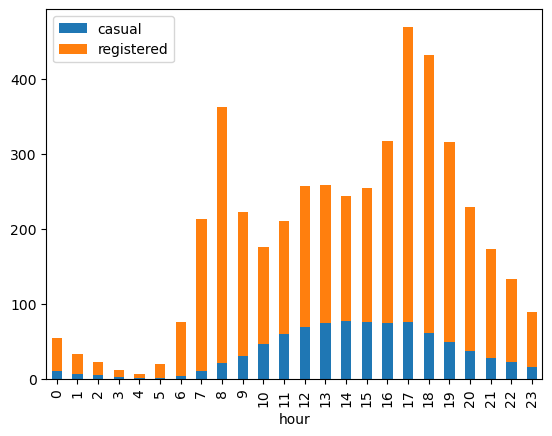

In [135]:
df[["casual", "registered"]].groupby(df["hour"]).mean().plot.bar(stacked = True)

<Axes: xlabel='day'>

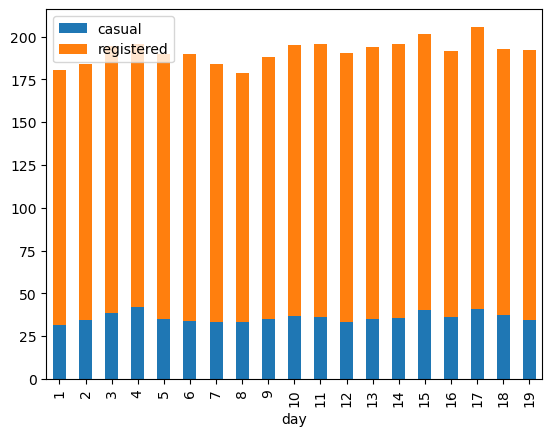

In [137]:
df[["casual", "registered"]].groupby(df["day"]).mean().plot.bar(stacked = True)

<Axes: xlabel='dayofweek', ylabel='count'>

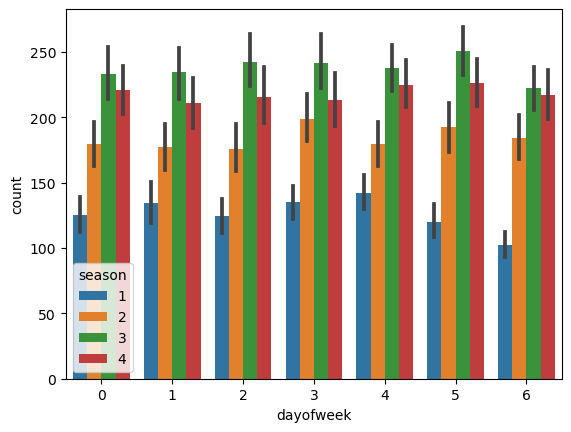

In [116]:
sns.barplot(data = df, x = df["dayofweek"], y = df["count"], hue = df["season"])

<Axes: xlabel='hour', ylabel='count'>

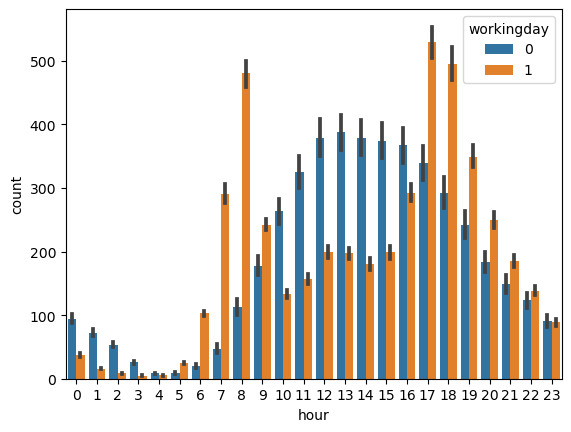

In [118]:
sns.barplot(data = df, x = df["hour"], y = df["count"], hue = df["workingday"])

<Axes: xlabel='hour', ylabel='count'>

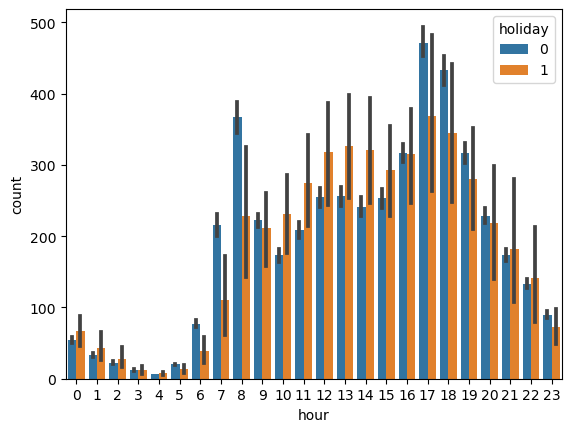

In [119]:
sns.barplot(data = df, x = df["hour"], y = df["count"], hue = df["holiday"])

<Axes: xlabel='month'>

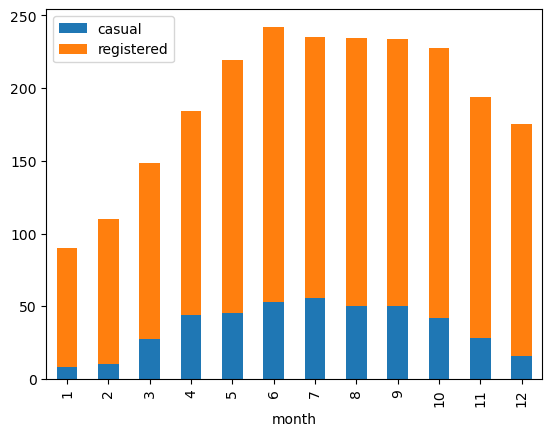

In [138]:
df[["casual", "registered"]].groupby(df["month"]).mean().plot.bar(stacked = True)

<Axes: xlabel='season'>

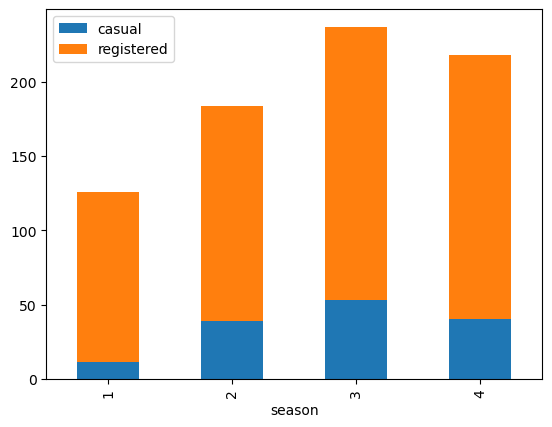

In [139]:
df[["casual", "registered"]].groupby(df["season"]).mean().plot.bar(stacked = True)

In [140]:
print(df[["casual", "registered", "count"]].groupby(df["holiday"]).mean())

            casual  registered       count
holiday                                   
0        35.646714  156.094941  191.741655
1        48.781350  137.096463  185.877814


In [141]:
print(df[["casual", "registered", "count"]].groupby(df["workingday"]).mean())

               casual  registered       count
workingday                                   
0           59.308290  129.198330  188.506621
1           25.107663  167.904209  193.011873


KeyboardInterrupt: 

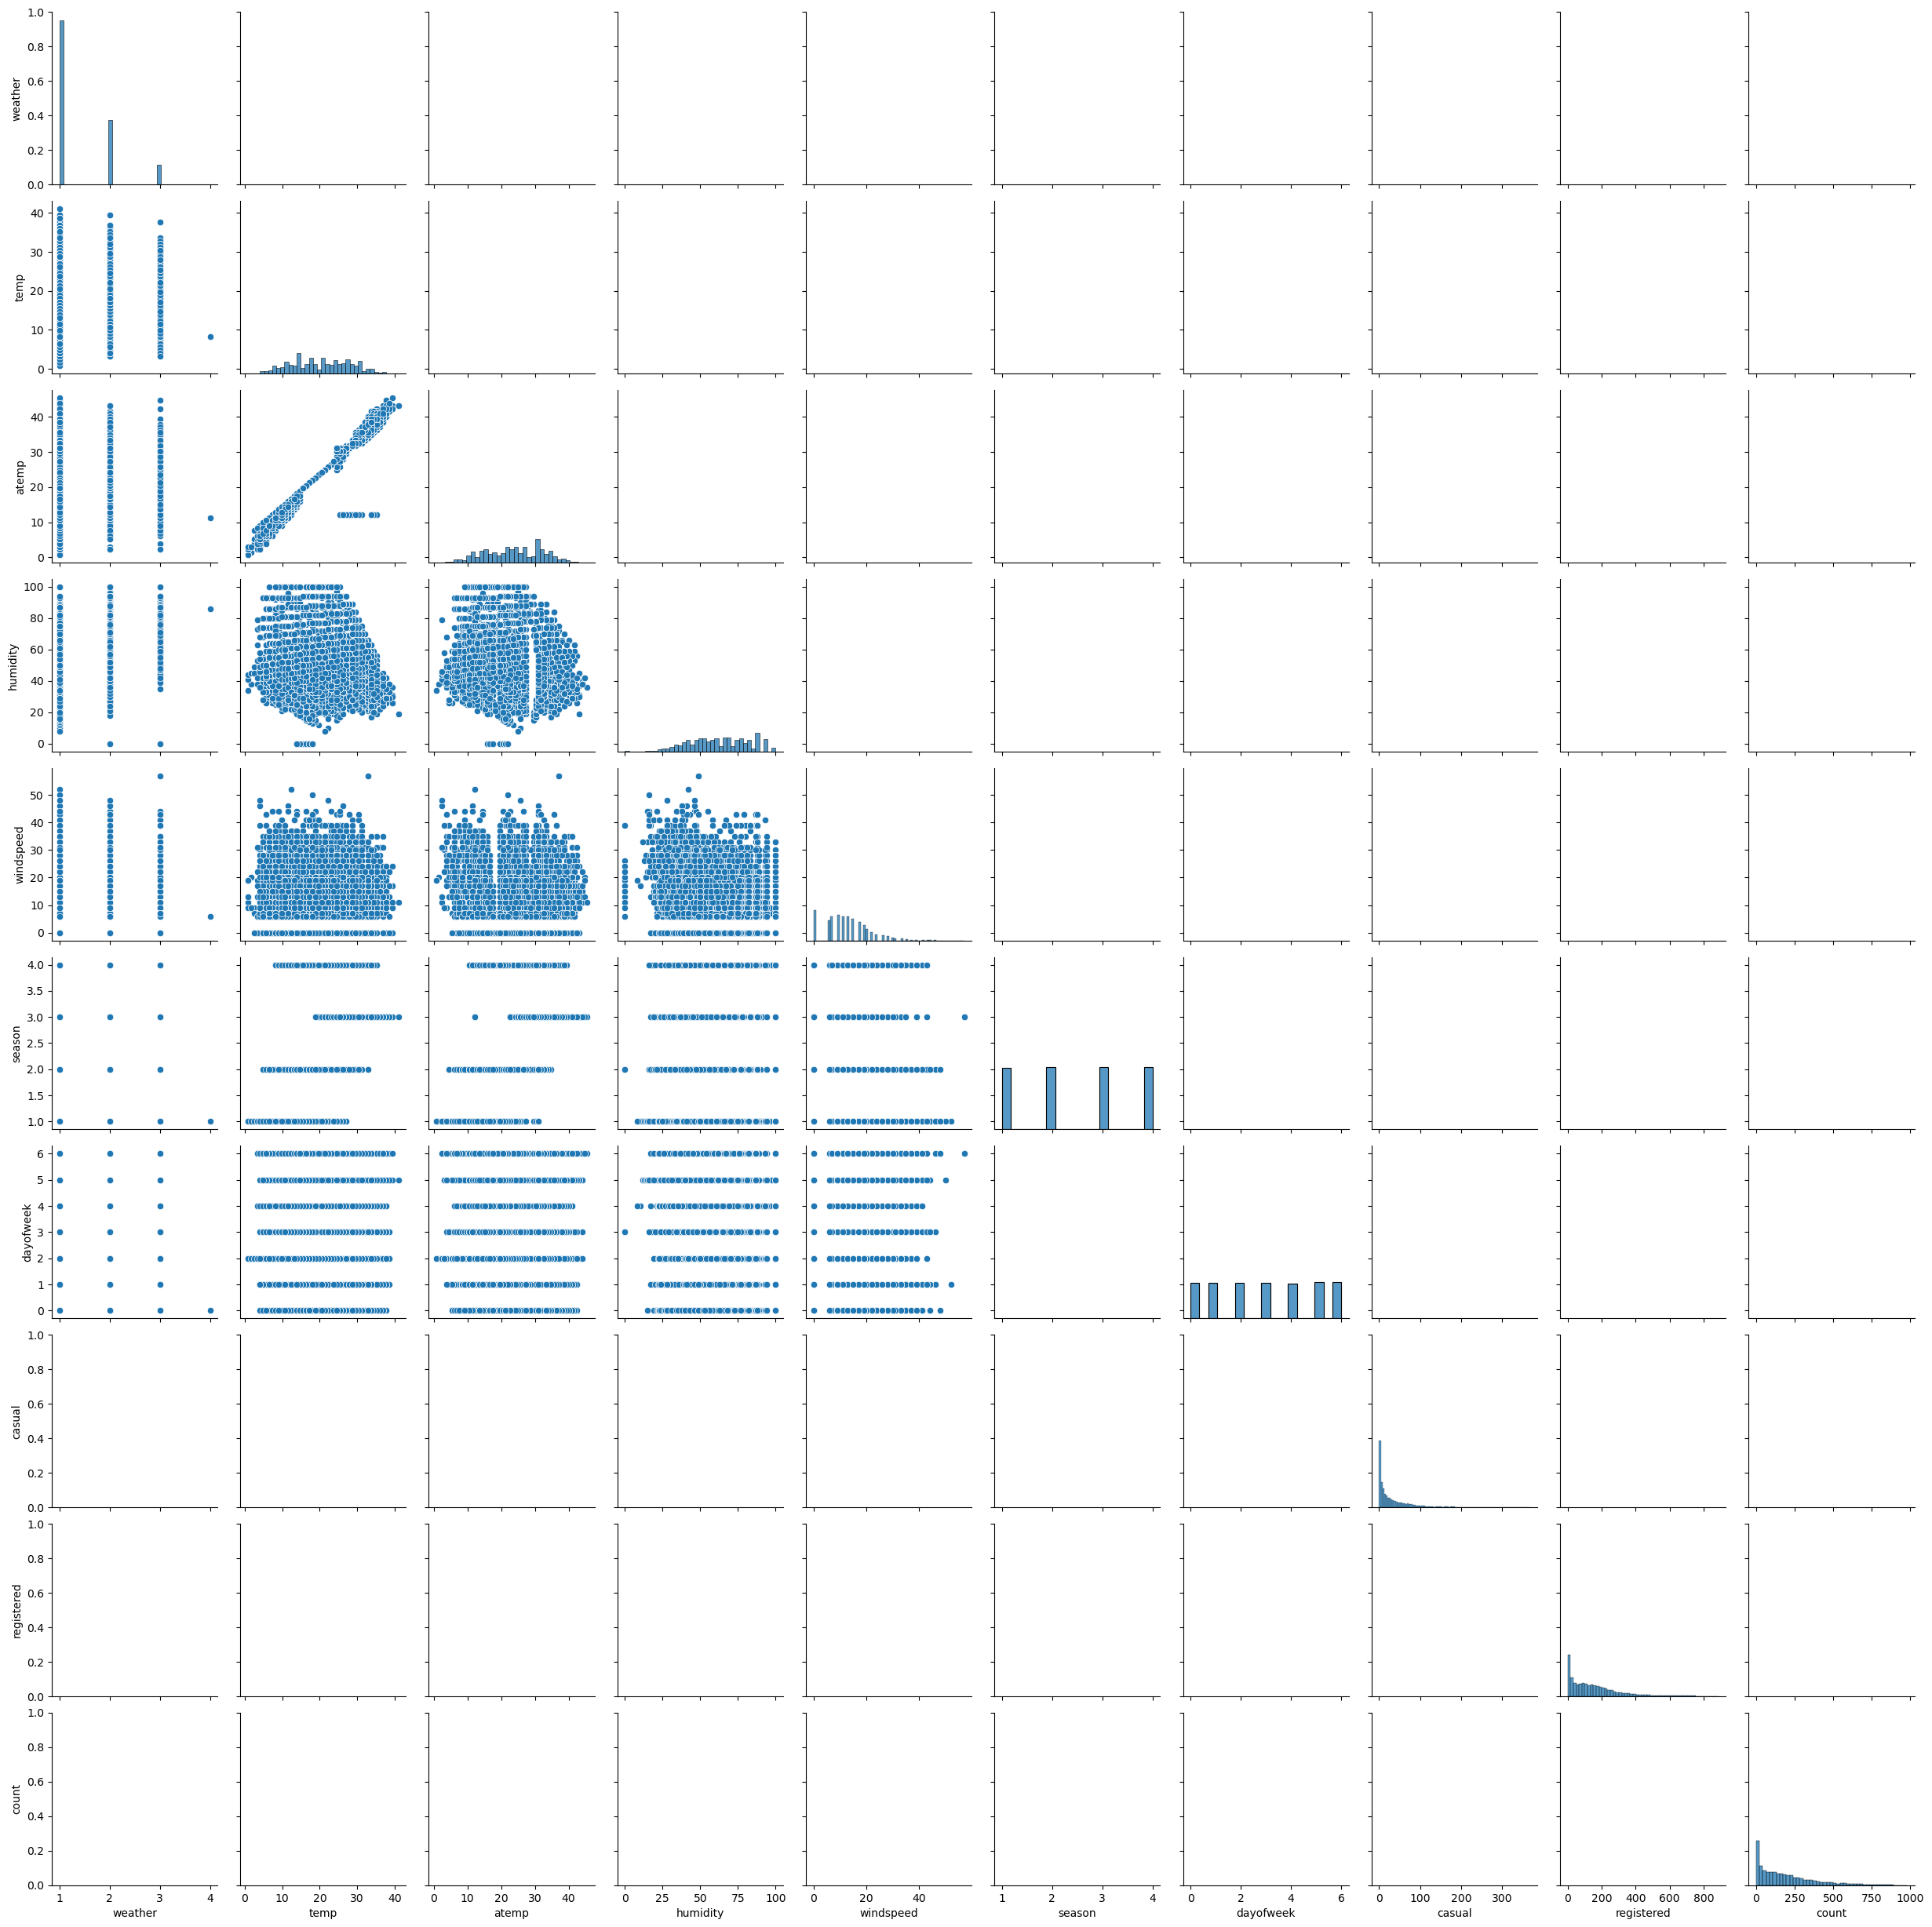

In [121]:
sns.pairplot(df, vars = ["weather", "temp", "atemp", "humidity", "windspeed", "season", "dayofweek", "casual", "registered", "count"])
#repeat with hue as holiday, working day

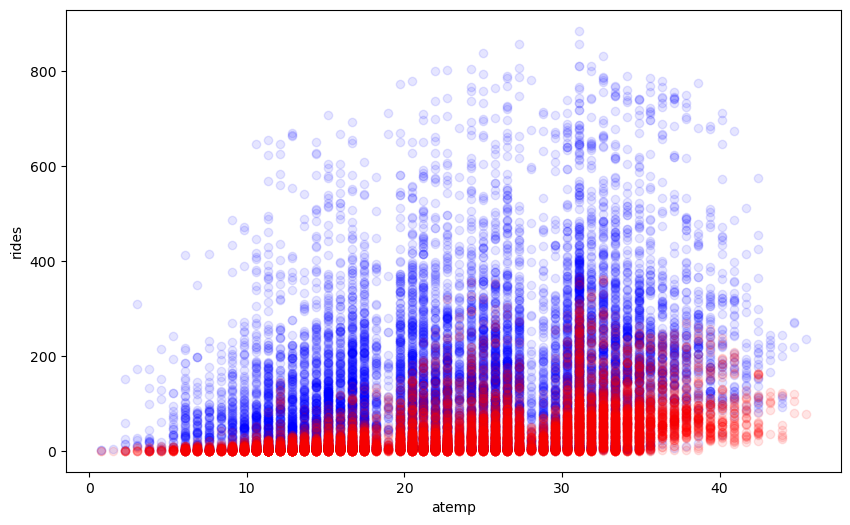

In [ ]:
fig, ax = plt.subplots(figsize = (10,6))

ax.scatter(x=df["atemp"], y=df["registered"], color="blue", label="registered", alpha = 0.1)
ax.scatter(x=df["atemp"], y=df["casual"], color="red", label="casual", alpha = 0.1)

ax.set_xlabel("atemp")
ax.set_ylabel("rides")

plt.show()